In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv("job-market(2).csv")

In [8]:
%matplotlib inline



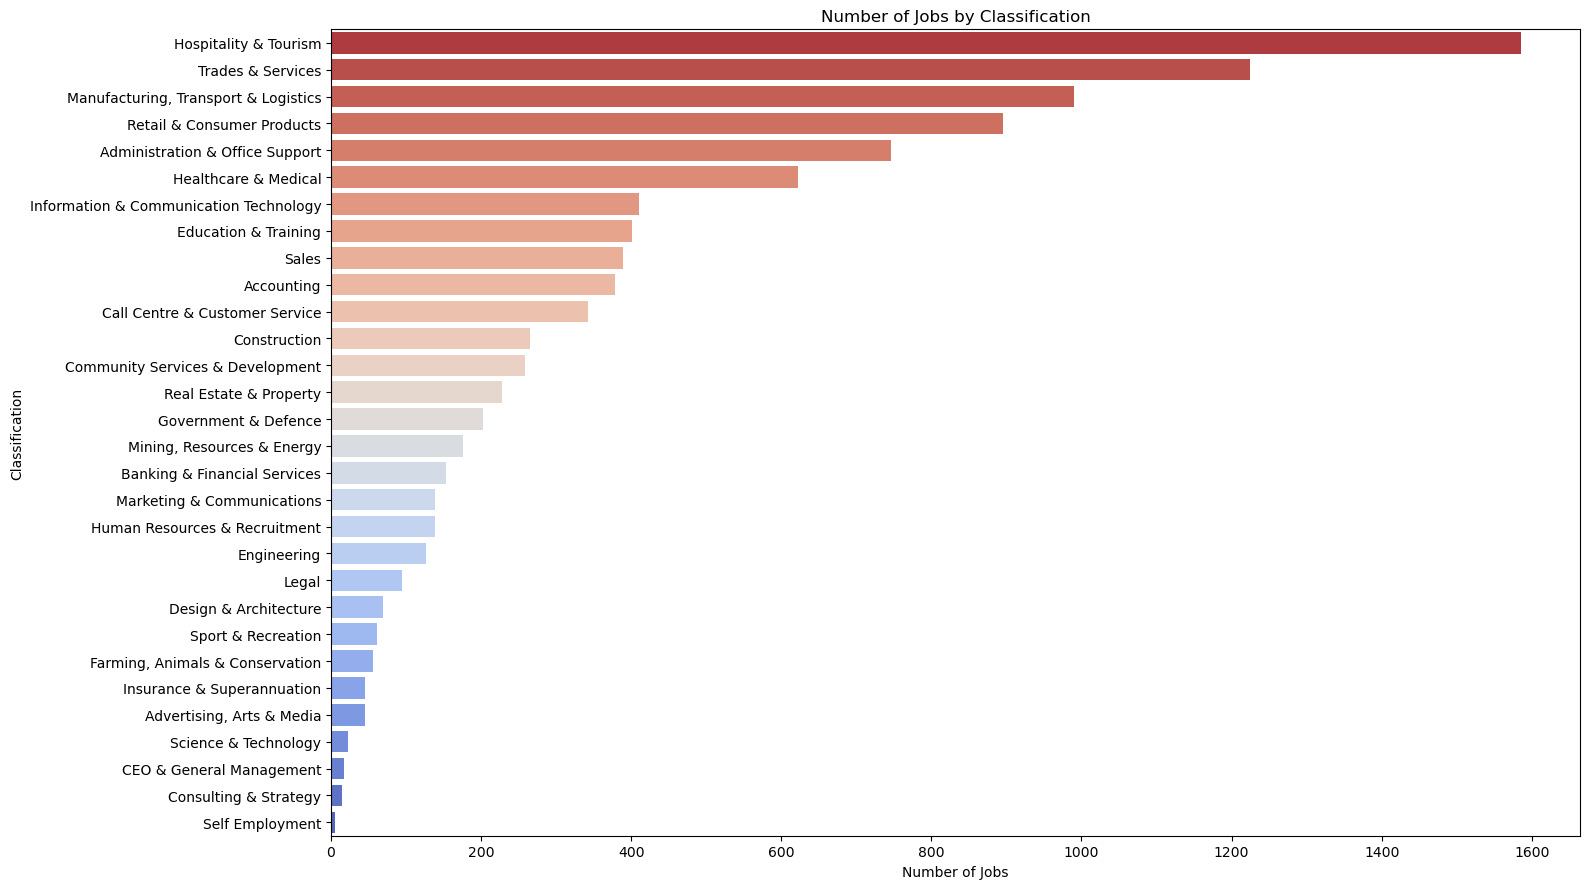

In [9]:
import matplotlib

#Classification job number plot
class_counts = df['Classification'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(16, 9))

colors = sns.color_palette("coolwarm_r", n_colors=len(class_counts))

sns.barplot(x=class_counts.values, y=class_counts.index, hue=class_counts.index, palette=colors, legend=False)

plt.title("Number of Jobs by Classification")
plt.xlabel("Number of Jobs")
plt.ylabel("Classification")
plt.tight_layout()
plt.show()

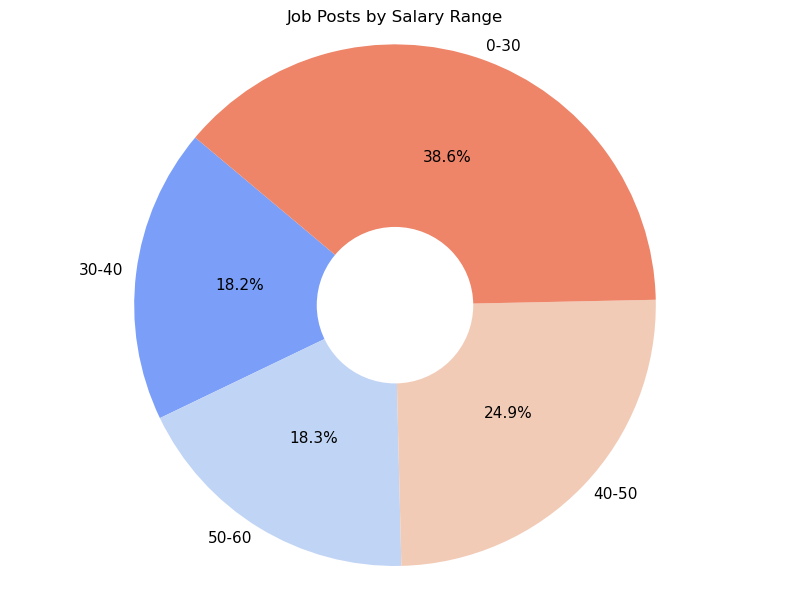

In [10]:
#salary ranges plot
df = df.dropna(subset=["LowestSalary", "HighestSalary"]).copy()

df["RangeLabel"] = df.apply(
    lambda row: f"{int(row['LowestSalary'])}-{int(row['HighestSalary'])}",
    axis=1
)

range_counts = df["RangeLabel"].value_counts()
range_counts = range_counts.sort_values(ascending=True)

plt.figure(figsize=(8, 6))

colors_pie = sns.color_palette("coolwarm", n_colors=len(range_counts))

wedges, texts, autotexts = plt.pie(
    range_counts,
    labels=range_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_pie,
    labeldistance=1.05,   
    pctdistance=0.6,     
    rotatelabels=False,   
    textprops={'fontsize': 11}
)

for wedge, autotext in zip(wedges, autotexts):
    r, g, b, a = wedge.get_facecolor()
    luminance = 0.299*r + 0.587*g + 0.114*b
    autotext.set_color("white" if luminance < 0.5 else "black")

centre_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title("Job Posts by Salary Range")
plt.tight_layout()
plt.show()

In [11]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,RangeLabel,Location,Count
Location,,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,238,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,390,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,19,Albury Area,19


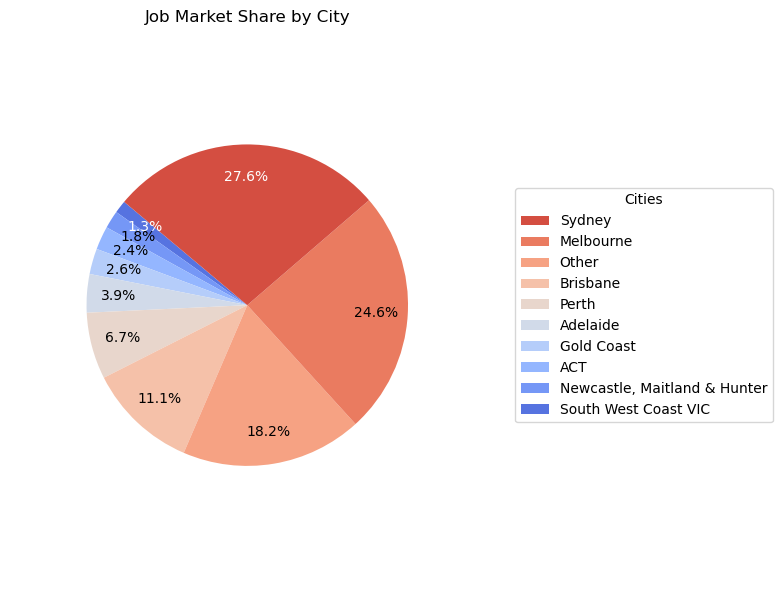

In [12]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

city_counts = df["Location"].value_counts()

top = 9

top_cities = city_counts.iloc[:top].copy()

other_sum = city_counts.iloc[top:].sum()
top_cities["Other"] = other_sum

top_cities = top_cities.sort_values(ascending=True)

colors_cities_pie = sns.color_palette("coolwarm", n_colors=len(top_cities))

plt.figure(figsize=(8, 6))

wedges, _, autotexts = plt.pie(
    top_cities,
    autopct="%1.1f%%",       
    startangle=140,
    colors=colors_cities_pie,
    pctdistance=0.8          
)

plt.axis('equal')
plt.title("Job Market Share by City")

for wedge, autotext in zip(wedges, autotexts):
    r, g, b, a = wedge.get_facecolor()
    luminance = 0.299*r + 0.587*g + 0.114*b
    autotext.set_color("white" if luminance < 0.5 else "black")

plt.legend(
    wedges[::-1],
    top_cities.index[::-1],
    title="Cities",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)

plt.tight_layout()
plt.show()